In [1]:
import convml_tt.data.sources.sampling.triplets as triplet_sampling
from convml_tt.data.sources import LocalCartesianDomain, CartesianDomain

import cartopy.crs as ccrs
import xarray as xr

%matplotlib inline

# Locally Cartesian Domain

array([[-150000.,   50000.],
       [ 150000.,   50000.],
       [ 150000.,  -50000.],
       [-150000.,  -50000.]])

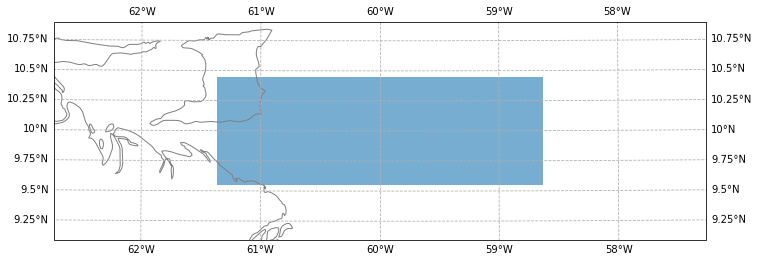

In [2]:
domain = LocalCartesianDomain(
    central_latitude=10, central_longitude=-60, l_zonal=300e3, l_meridional=100e3
)

ax = domain.plot_outline()

domain.spatial_bounds

(-38.84584113279831, 15.248612912515451, -45)

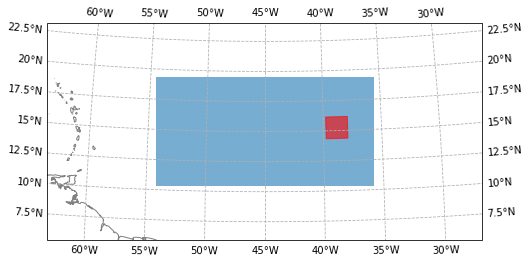

In [3]:
domain = LocalCartesianDomain(
    central_latitude=15, central_longitude=-45, l_zonal=2000e3, l_meridional=1000e3
)

ax = domain.plot_outline()

tile = triplet_sampling.generate_randomly_located_tile(domain=domain, tile_size=200e3)
tile.plot_outline(ax=ax, color="red")

tile.central_longitude, tile.central_latitude, domain.central_longitude

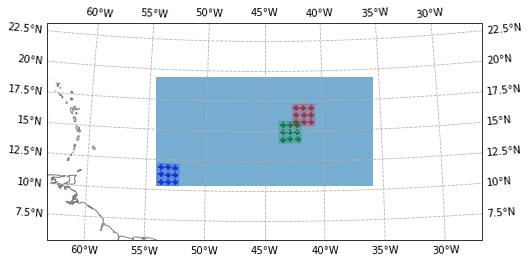

In [4]:
domain = LocalCartesianDomain(
    central_latitude=15, central_longitude=-45, l_zonal=2000e3, l_meridional=1000e3
)

ax = domain.plot_outline()

triplet_tiles = triplet_sampling.generate_triplet_location(domain=domain, tile_size=200e3)

for tile, color in zip(triplet_tiles, "rgb"):
    tile.plot_outline(ax=ax, color=color, alpha=0.2)
    
    da_grid = tile.get_grid(N=3)
    ax.scatter(da_grid.lon, da_grid.lat, marker='.', transform=ccrs.PlateCarree(), color=color)
    ax.scatter(*xr.broadcast(da_grid.x, da_grid.y), marker='+', transform=da_grid.crs, color=color)
    
    #print(da_grid)
    
#ax.set_global()

In [5]:
triplet_tiles[1].get_grid(N=3)

<xarray.Dataset>
Dimensions:  (x: 3, y: 3)
Coordinates:
  * x        (x) float64 -6.667e+04 0.0 6.667e+04
  * y        (y) float64 -6.667e+04 1.455e-11 6.667e+04
Data variables:
    lon      (x, y) float64 -43.43 -43.43 -43.43 -42.81 ... -42.19 -42.19 -42.19
    lat      (x, y) float64 14.33 14.93 15.53 14.33 ... 15.53 14.33 14.93 15.53
Attributes:
    crs:      <cartopy.crs.LambertAzimuthalEqualArea object at 0x7f8d47559110>

# Rectangular domain

array([[-150000.,   50000.],
       [ 150000.,   50000.],
       [ 150000.,  -50000.],
       [-150000.,  -50000.]])

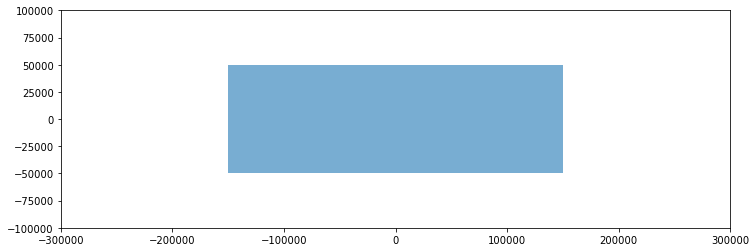

In [6]:
domain = CartesianDomain(l_zonal=300e3, l_meridional=100e3)

ax = domain.plot_outline()

domain.spatial_bounds

(112777.48144654144, -38378.10228287397)

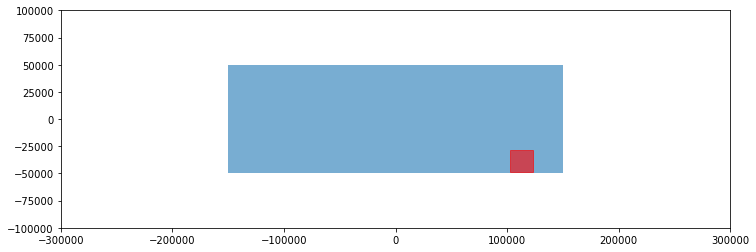

In [7]:
domain = CartesianDomain(l_zonal=300e3, l_meridional=100e3)

ax = domain.plot_outline()

tile = triplet_sampling.generate_randomly_located_tile(domain=domain, tile_size=20e3)
tile.plot_outline(ax=ax, color="red")
tile.x_c, tile.y_c

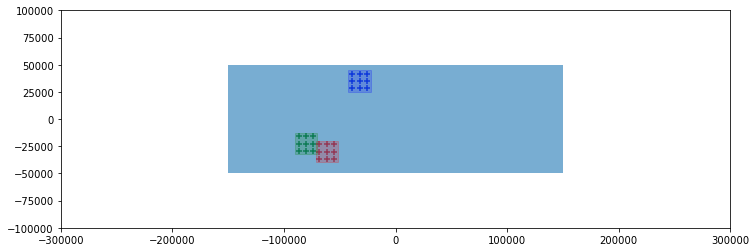

In [8]:
domain = CartesianDomain(l_zonal=300e3, l_meridional=100e3)


ax = domain.plot_outline()

triplet_tiles = triplet_sampling.generate_triplet_location(domain=domain, tile_size=20e3)

for tile, color in zip(triplet_tiles, "rgb"):
    tile.plot_outline(ax=ax, color=color, alpha=0.2)
    
    da_grid = tile.get_grid(N=3)
    ax.scatter(*xr.broadcast(da_grid.x, da_grid.y), marker='+', color=color)